# Assignment I: Credit Card Fraud Detection 

## Task: automatically detect transactions that are likely to be frauds  

The Data for this assignment is fron the following  Kaggle challenge: https://www.kaggle.com/mlg-ulb/creditcardfraud

### Problem description
**Context**
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## Data
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.





In [1]:
#download data
!unzip creditcard.csv.zip

Der Befehl "unzip" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


## Task 1: Problem Statement
Discuss the problem setting and the first implecations of the given data set... 
* What assumptions can we make about the data?
* What problems are we expecting?

**Assumptions:**
- Each row show a credit card transaction
- The column "time" is the time of the transaction. 0sec is the first transaction on day 1 and after 172.792 sec is the last transaction (2 days are about 172.800 seconds)
- The column "Amount" ist the result of a PCA Dimensionality reduction to protect user identities and sensitive features
- The column "Class"  shows fraudulent (1) and non-fraudulent (0) transactions
- We assume that the column "class" has correct values

**Possible problems:**
- The dataset is highly unbalanced  -->  only 0.172% of all transactions are fraudulent 
- But this minority class is important in this Task
- The model will probably not generalize well from the training data to test data
- the algorithm will probably overfit because it will assume that most transaction are non-fraudulent
- Since fraudulent transactions are so unlikely, many false positives will occur despite high accuracy

# Task 2: First Data Analysis and Cleaning
* Import the data to a Pandas DataFrame
* Run first simple statistics and visualizations
* Is there a need to clean the data? If yes, do so...

see: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('creditcard.csv')
pd.set_option('display.float', '{:.3f}'.format)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,...,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,...,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,...,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,...,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,...,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0


In [4]:
data.shape

(284807, 31)

In [5]:
data.info()
#data.isnull().sum()
#data.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
#print Discription about fraudulent(1) and non-fraudulent(0)) cases
data.groupby(by="Class")[["Time", "Amount"]].describe().T

Class                 0          1
Time   count 284315.000    492.000
       mean   94838.202  80746.807
       std    47484.016  47835.365
       min        0.000    406.000
       25%    54230.000  41241.500
       50%    84711.000  75568.500
       75%   139333.000 128483.000
       max   172792.000 170348.000
Amount count 284315.000    492.000
       mean      88.291    122.211
       std      250.105    256.683
       min        0.000      0.000
       25%        5.650      1.000
       50%       22.000      9.250
       75%       77.050    105.890
       max    25691.160   2125.870

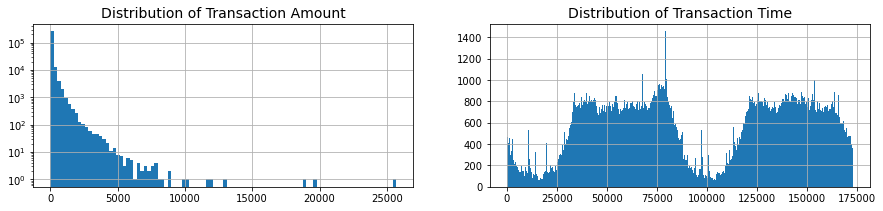

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15,3))

data['Amount'].hist(bins=100,  ax=ax[0], log = True)
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)

data['Time'].hist(bins=500, ax=ax[1]);
ax[1].set_title('Distribution of Transaction Time', fontsize=14)

plt.show()

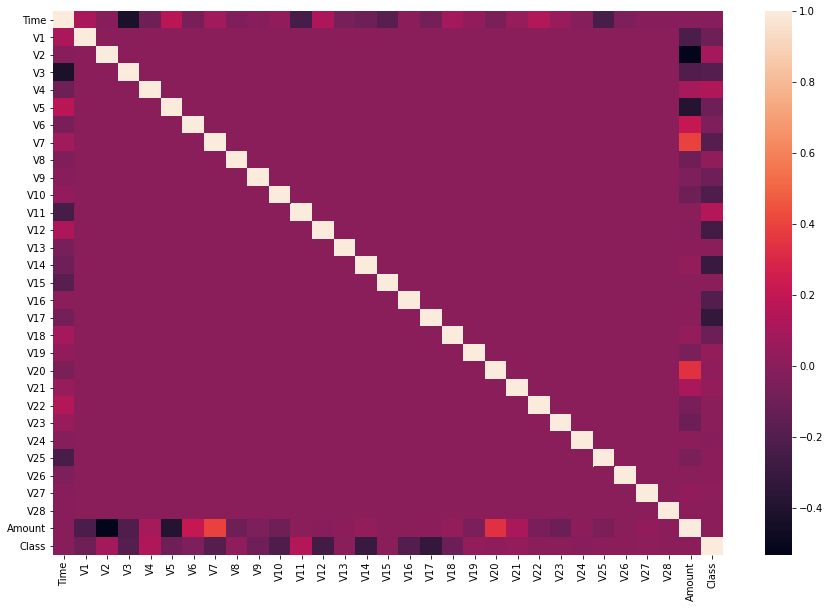

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(data=data.corr());

**Notice**
- High (negative) correlation between:
    - Amount and V2
    - Amount and V5
    - Time and V3
    
(V2 and V3 can be deleted for optimization)

In [9]:
#data.drop(['V2','V3','V5'],axis=1, inplace=True)

# Task 3: Dataset Preparation + Validation
* Should we pepare a validation set? Or use other approaches? -> do so.
* How should we meassure the quality of our model?

In [10]:
import numpy as np

In [11]:

# >> not used because of lower accuracy and precision <<

#Most of our data has already been scaled --> So Amount and Time should also be scaled
from sklearn.preprocessing import StandardScaler

#std_scaler = StandardScaler()

#data['scaled_amount'] = std_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
#data['scaled_time'] = std_scaler.fit_transform(data['Time'].values.reshape(-1,1))

#data.drop(['Time','Amount'], axis=1, inplace=True)

data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,...,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,...,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,...,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,...,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,...,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0


In [12]:
from sklearn.model_selection import train_test_split

X = data.drop('Class', axis = 1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)

In [13]:
# Balance Dataset --> no improvement

#!pip install imblearn  
#from imblearn.over_sampling import SMOTE

#print("Transaction Number x_train dataset: ", X_train.shape)
#print("Transaction Number y_train dataset: ", y_train.shape)
#print("Transaction Number x_test dataset: ", X_test.shape)
#print("Transaction Number y_test dataset: ", y_test.shape)

#print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
#print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

#sm = SMOTE(random_state=2)
#X_train_s, y_train_s = sm.fit_sample(X_train, y_train.ravel())

#print('After OverSampling, the shape of train_x: {}'.format(X_train_s.shape))
#print('After OverSampling, the shape of train_y: {} \n'.format(y_train_s.shape))

#print("After OverSampling, counts of label '1', %: {}".format(sum(y_train_s==1)/len(y_train_s)*100.0,2))
#print("After OverSampling, counts of label '0', %: {}".format(sum(y_train_s==0)/len(y_train_s)*100.0,2))

#sns.countplot(x=y_train_s, data=data, palette='CMRmap')

# Task 4: Train a Gaussian Naive Bayes Classifier
* Train and evaluate the model using the approach from task 3
* Diskuss the results -> possible improovements?

See: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB


In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [19]:
bayes = GaussianNB()
bayes.fit(X_train, y_train)

y_pred = bayes.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', acc)
print('Precision', prec)
print('F1:', f1)


Accuracy: 0.9928022190232084
Precision 0.1336405529953917
F1: 0.22053231939163498


In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(bayes.predict(X_test), y_test)

array([[28247,    17],
       [  188,    29]], dtype=int64)

**Discussion**
- We got a high recall which means our model is able to detect the highest number of fraud transactions, while the precision is very low which is not good because it means that the model classifies a lot of non-fraud transactions as fraud. 
- I thought if I scale Time and Amount I would get a better result, but it was not the case
- Maybe higher weighting of the minority class
- Or get more fraudulent cases